In [138]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [139]:
iris_bunch = datasets.load_iris(as_frame=True)
df = iris_bunch.data

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
# Nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=1)

In [142]:
x = iris_bunch.data
y = iris_bunch.target # These are the categories of iris; category names are in iris_bunch.target_names
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [154]:
from sklearn.model_selection import train_test_split
# Split testing the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=10) # 50% split
print('training size', len(X_train))
print('testing size', len(X_test))
knn.fit(X_train[['sepal length (cm)', 'sepal width (cm)']], y_train)

training size 75
testing size 75


KNeighborsClassifier(n_neighbors=1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

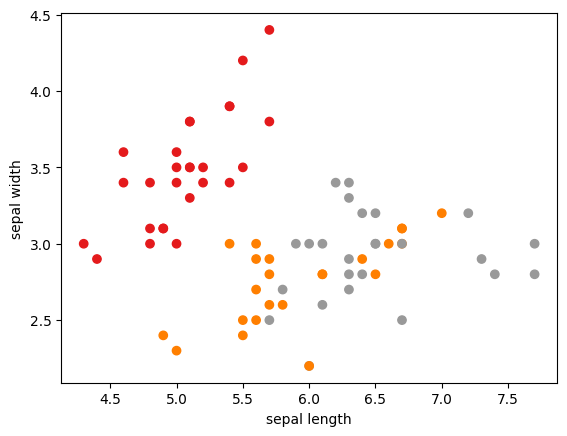

In [155]:
# Show test classifications
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend([iris_bunch.target_names])
plt.show()

In [ ]:
print('score', knn.score(X_test, y_test))

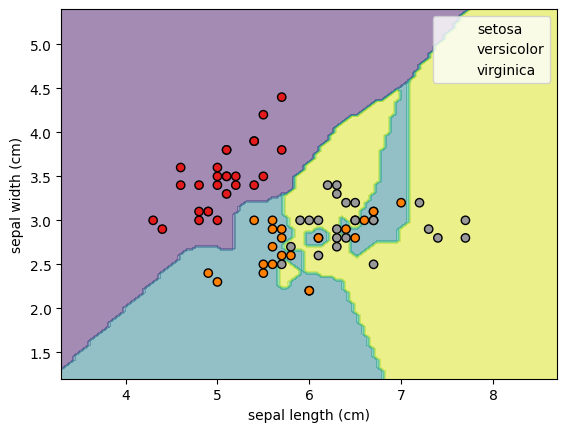

In [166]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    knn, X_train[['sepal length (cm)', 'sepal width (cm)']], response_method="predict",
    xlabel=iris_bunch.feature_names[0], ylabel=iris_bunch.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X_train[['sepal length (cm)']], X_train[['sepal width (cm)']], c=y_train, cmap=plt.cm.Set1 ,edgecolor="k")
plt.show()

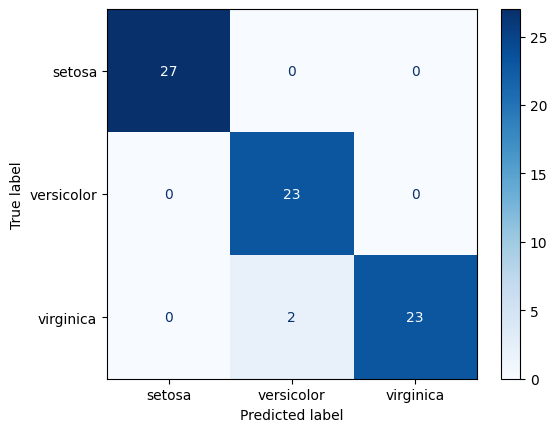

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_train[['sepal length (cm)', 'sepal width (cm)']], y_train, cmap=plt.cm.Blues, display_labels=iris_bunch.target_names)gi